In [1]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
import matplotlib.pyplot as plt
import datetime

data = pd.read_csv('kopi-chat-new.txt', sep="\t", header=None, names=list('abc'))
data = data.applymap(str);

In [2]:
def validate(date_text):
    try:
        datetime.datetime.strptime(date_text, '%Y/%m/%d')
        return True
    except ValueError:
        return False

def is_date(string):
    try: 
        parse(string)
        return True
    except ValueError:
        return False

In [3]:
if ("Riwayat obrolan" in data.iloc[0]['a']): 
    data = data.drop([0,1])
    data = data.reset_index(drop=True)
    
list_day = ["(Sen)", "(Sel)", "(Rab)", "(Kam)", "(Jum)", "(Sab)", "(Min)"]

for x in range(0,len(data)):
    a = data.iloc[x]['a']
    if any(y in a for y in list_day):
        for y in list_day:
            data.iloc[x]['a'] = (data.iloc[x]['a']).replace(y, "")
    data.iloc[x]['a'] = (data.iloc[x]['a']).replace("24:", "00:")   

In [4]:
list_delete = []

for x in range(0,len(data)):
    a = data.iloc[x]['a']
#     print (a)
    if (is_date(a)==False):
        data.loc[(x-1), 'c'] += " " + a
        list_delete.append(x)
        
data = data.drop(list_delete)        
data = data.reset_index(drop=True)

In [5]:
data.to_csv("ichanfs.csv", sep='\t', encoding='utf-8')

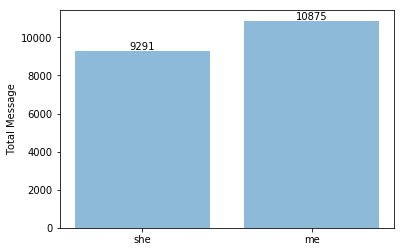

In [6]:
total_icha = len(data[data['b'] == 'Icha'])
total_setyan = len(data[data['b'] == 'setyan pamungkas'])

objects = ["She", "Me"]
y_pos = np.arange(len(objects))
datas = [total_icha, total_setyan]

fig, ax = plt.subplots()
ax.bar(y_pos, datas, align='center', alpha=0.5)
ax.set_xticks(y_pos)
ax.set_xticklabels(["she", "me"])
ax.set_ylabel('Total Message')
rects = ax.patches

for rect, label in zip(rects, datas):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height -25, label,
            ha='center', va='bottom')

plt.draw()

In [7]:
words_edit = pd.Series(' '.join(data['c']).lower().split())
words_edit = words_edit[words_edit != "nan"]
words_edit = words_edit.reset_index(drop=True)

total_words = len(words_edit)

words_setyan = pd.Series(' '.join(data['c'][data['b'] == 'setyan pamungkas']).lower().split())
words_icha = pd.Series(' '.join(data['c'][data['b'] == 'Icha']).lower().split())
total_words_set = len(words_setyan)
total_words_icha = len(words_icha)

# undefinied = pd.Series(' '.join(data['c'][~((data['b'] == 'Icha') | (data['b'] == 'setyan pamungkas'))]).lower().split())
# print (undefinied)

print (str(total_words) + " " + str(total_words_set) + " " + str(total_words_icha))

233229 134082 99150


In [8]:
average_m = total_words/(total_icha + total_setyan)
print (average_m)
average_icha = total_words_icha/total_icha
average_set = total_words_set/total_setyan
print (average_icha)
print (average_set)

11.565456709312704
10.671617694543107
12.329379310344828


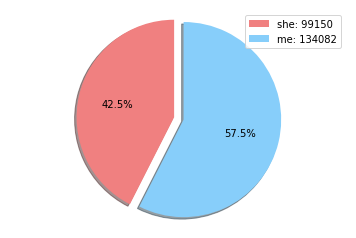

In [40]:
labels = ["she: " + str(total_words_icha), "me: " + str(total_words_set)]
sizes = [total_words_icha, total_words_set]

colors = ['lightcoral', 'lightskyblue']

fig, ax = plt.subplots()
#ax.pie(sizes, autopct=lambda p: '{:.0f}'.format(p * total_words / 100), colors=colors, shadow=True, startangle=90)
ax.pie(sizes, explode=(0.1, 0) ,autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
ax.legend(labels, loc="upper right")
 
ax.axis('equal')
plt.draw()

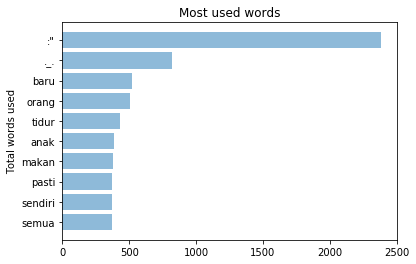

In [56]:
remove_word = ["yg", "ga", "kan", "dan", "ya", "nan", "kalau", "aja", "ada", "di", 
               "itu", "sama", "ini", "tapi", "kalo", "(laugh)", "(haha)" , 
               "udah","mau", "juga", "bisa", "jadi", "yang", "d", "lagi",
              "with", "laughter", "(crying", "guy)", "kok", "iyaa", "iya", "gitu", "dia", "cha", "mas,",
              "icha", "dia", "[stiker]", "(tertawa)", "wkwkwk", "ke", "sih", "aku",
              "mas", "kamu", "tak", "(catface)", "dari", "apa", "cuman", "cha,", "tau", "kayak", "jangan",
              "(har", "har)", "kayaknya", "?", "wes", "wkwk,", "buat", "emang", "banget", "dulu", "yaa", "biar", "mereka", 
              "banyak", "mas?", "harus", "pake", "gak", "trus", "gimana", "nanti", "e", "bikin", "[foto]", "tadi", "cha?",
              "coba", "kita", "masih", "terus", "pak", "punya", "wkwk"]

words_edit = words_edit[~words_edit.isin(remove_word)]
most_word = words_edit.value_counts()[:10]
most_word = most_word[::-1] #reverse from low

objects = list(most_word.index)
y_pos = np.arange(len(objects))
datas = most_word.tolist()

fig, ax = plt.subplots()
ax.barh(y_pos, datas, align='center', alpha=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(objects)
ax.set_ylabel('Total words used')
ax.set_title('Most used words')
rects = ax.patches

# for rect, label in zip(rects, datas):
#     height = rect.get_height()
#     width = rect.get_width()
#     ax.text(label + 3, rect+.25, str(label),
#             ha='right', va='center')
# #     ax.text(rect.get_y() + rect.get_height()/2, width -25, label,
# #             ha='right', va='center')

# print (total_words)
plt.draw()

In [33]:
list_delete = []
data_date = data.reset_index(drop=True)
data_date['d'] = ''

for x in range(0,len(data_date)):
    if (validate (data_date['a'][x])):
        list_delete.append(x)        
        date = data_date['a'][x]
    else:
        data_date['d'][x] = date 

data_date = data_date.drop(list_delete)
data_date = data_date.reset_index(drop=True)

In [34]:
data_date['e'] = ''

for x in range(0,len(data_date)):
    data_date['e'][x] = data_date['d'][x][:-3]


# print (data_date.head(50))

In [35]:
count_icha = data_date[data_date['b'] == 'Icha'].groupby('e')
count_icha = count_icha.agg(np.size)

count_setyan = data_date[data_date['b'] == 'setyan pamungkas'].groupby('e')
count_setyan = count_setyan.agg(np.size)

objek1 = list(count_setyan.index)
objek2 = list(count_icha.index)

not_in_icha = [x for x in objek1 if x not in objek2]
not_in_set = [x for x in objek2 if x not in objek1]

for x in range(len(not_in_icha)):
    count_icha.loc[not_in_icha[x]] = [0, 0, 0]
    
for x in range(len(not_in_set)):
    count_setyan.loc[not_in_set[x]] = [0, 0, 0]

In [36]:
count_setyan.sort_index(inplace=True)
count_icha.sort_index(inplace=True)
objek = list(count_setyan.index)
# objek = [s.replace('2018/', '') for s in objek]

setyanp = count_setyan['a'].values.tolist()
ichanfs = count_icha['a'].values.tolist()

In [42]:
print(setyanp)
print(ichanfs)

[6, 653, 1029, 312, 225, 133, 114, 103, 181, 134, 118, 62, 129, 118, 103, 56, 61, 48, 151, 32, 42, 1273, 3345, 860, 70, 299, 165, 438, 268, 93, 144, 45, 65]
[8, 660, 862, 291, 209, 121, 115, 94, 165, 122, 108, 48, 130, 109, 91, 51, 49, 40, 136, 30, 40, 1064, 2613, 799, 62, 276, 141, 372, 227, 70, 101, 41, 46]


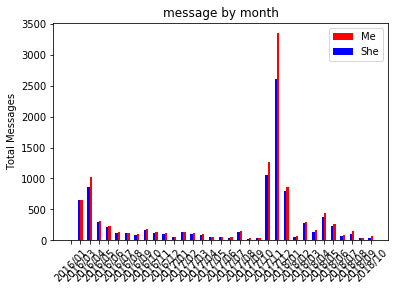

<Figure size 2160x216 with 0 Axes>

In [38]:
ind = (np.arange(len(ichanfs)))  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, setyanp, align='edge', width=0.25, color='r')

rects2 = ax.bar(ind, ichanfs, align='edge', width=-0.25, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Total Messages')
ax.set_title('message by month')
ax.set_xticks(ind)
ax.xaxis.set_tick_params(rotation=45)

ax.set_xticklabels(objek)

ax.legend((rects1[0], rects2[0]), ('Me', 'She'))
plt.figure(figsize=(30, 3))
plt.show()